*Creado por:*

*Isabel Maniega*

# Ejercicio 4

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset = dataset.drop(['User ID'], axis=1)
dataset['Gender'] = pd.get_dummies(dataset['Gender'],drop_first=True, dtype=int)
dataset

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<Axes: >

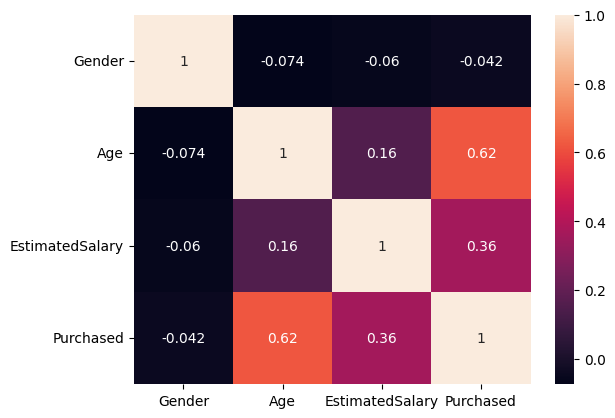

In [5]:
#gives positive & negative relation between categories
sns.heatmap(dataset.corr(), annot=True)

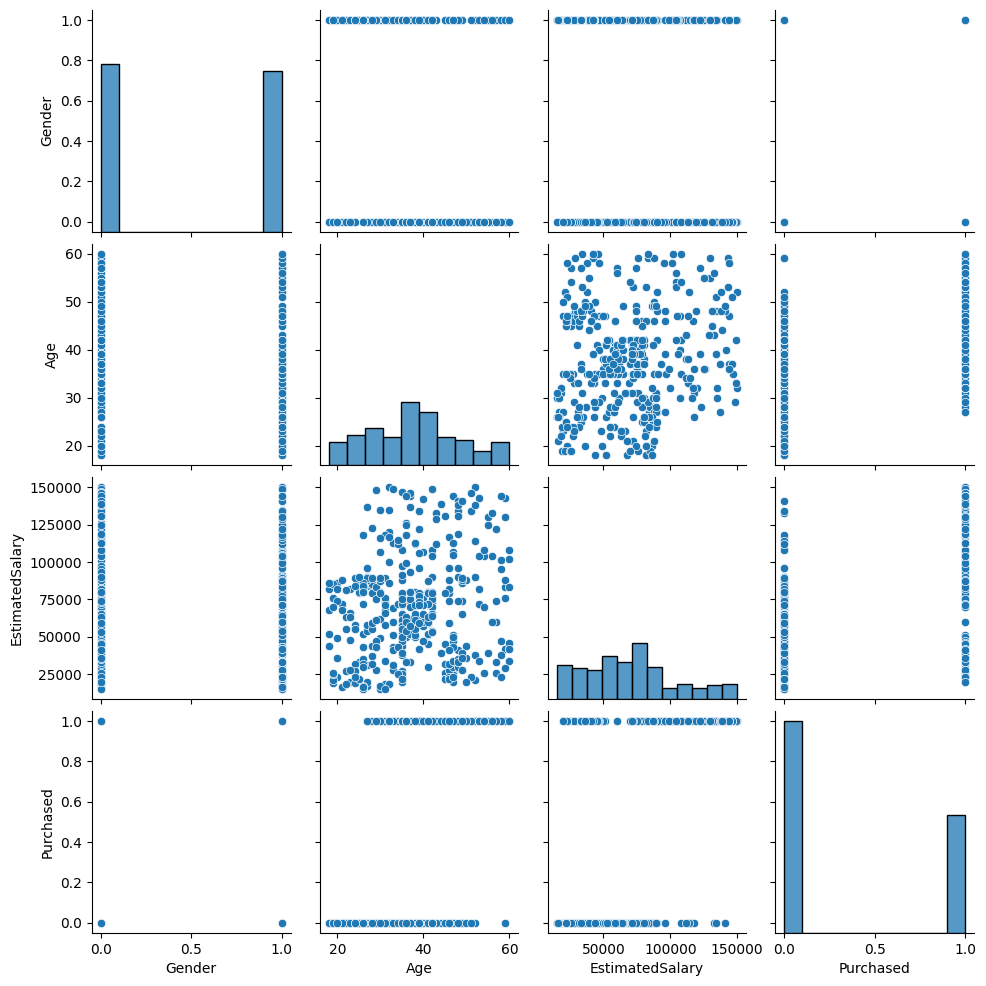

In [6]:
sns.pairplot(dataset)

In [7]:
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 3].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

In [13]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.8928571428571429


In [14]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.9


In [15]:
# Calcular la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print("Sensibilidad del modelo")
print(sensibilidad)

Sensibilidad del modelo
0.78125


In [16]:
# Calculo el puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print("Puntaje F1 del modelo")
print(puntajef1)

Puntaje F1 del modelo
0.8333333333333334


In [17]:
# Calculo la curva ROC -AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print("Curva ROC - AUC del modelo:")
print(roc_auc)

Curva ROC - AUC del modelo:
0.8685661764705882


# KNN

In [18]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [20]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [21]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.8787878787878788


In [22]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.93


# SVM

In [23]:
# Fitting SVM to the Training set
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 9, 23]])

In [26]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.92


In [27]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.89


# Naives-Bayes

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 7, 25]])

In [31]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.9259259259259259


In [32]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.91


# Decission Tree Classification

In [33]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]])

In [36]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.8529411764705882


In [37]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.92


# Random Forest Classification

In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 4, 28]])

In [41]:
# Calculo de precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.875


In [42]:
# calculo para la exactitud del modelo

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.92


**Conclusión**

El mejor modelo para este caso es el KNN., con un 93% de acierto

*Creado por:*

*Isabel Maniega*